In [82]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [83]:
class GraphState(TypedDict):
    message: str

In [84]:
def node_a(state: GraphState) -> GraphState:
    state['message'] = "Im in Node A"
    return state

def node_b(state: GraphState) -> GraphState:
    state['message'] = "Im in Node B"
    return state

def node_c(state: GraphState) -> GraphState:
    state['message'] = "Im in Node C"
    return state

In [85]:
graph_builder = StateGraph(GraphState)
graph_builder.set_entry_point("A")
graph_builder.add_node("A", node_a )
graph_builder.add_node("B", node_b )
graph_builder.add_node("C", node_c )
graph_builder.add_edge("A", "B")
graph_builder.add_edge("A", "C")
graph_builder.set_finish_point("B")
graph_builder.set_finish_point("C")
graph = graph_builder.compile()

In [86]:
from langgraph.graph.state import CompiledStateGraph
from IPython.display import Image, display

def draw_graph(graph: CompiledStateGraph):
    display(Image(graph.get_graph().draw_mermaid_png()))


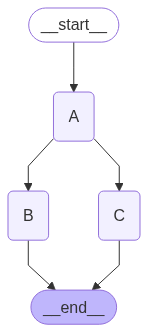

In [87]:
draw_graph(graph)

In [88]:
result = graph.invoke({"message", ""})

InvalidUpdateError: Expected dict, got {'', 'message'}
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_GRAPH_NODE_RETURN_VALUE

In [ ]:
from operator import add
from typing import Annotated
class UpdatedGraphState(TypedDict):
    messages: Annotated[str,add]

In [ ]:
def node_a(state: UpdatedGraphState) -> UpdatedGraphState:
    state['messages'] = "Im in Node A "
    return state

def node_b(state: UpdatedGraphState) -> UpdatedGraphState:
    state['messages'] = "Im in Node B " 
    return state

def node_c(state: UpdatedGraphState) -> UpdatedGraphState:
    state['messages'] = "Im in Node C "
    return state

In [ ]:
graph_builder = StateGraph(UpdatedGraphState)
graph_builder.set_entry_point("A")
graph_builder.add_node("A", node_a )
graph_builder.add_node("B", node_b )
graph_builder.add_node("C", node_c )
graph_builder.add_edge("A", "B")
graph_builder.add_edge("A", "C")
graph_builder.set_finish_point("B")
graph_builder.set_finish_point("C")
graph = graph_builder.compile()

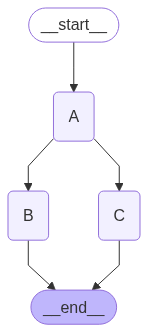

In [ ]:
draw_graph(graph)

In [ ]:
result = graph.invoke({"messages": ""})

In [ ]:
print(result)


{'messages': 'Im in Node A Im in Node B Im in Node C '}


In [ ]:
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage, AnyMessage

In [ ]:
from langgraph.graph import add_messages

In [ ]:
messages = []

In [ ]:
messages = add_messages(messages,[HumanMessage("How are you")])

In [ ]:
messages

[HumanMessage(content='How are you', additional_kwargs={}, response_metadata={}, id='cde88fc2-54d4-40ff-b2b4-db49180310e5')]

In [ ]:
messages = add_messages(messages,[HumanMessage("What are you"), AIMessage("Im an LLM"), HumanMessage("What is LLM?")])

In [ ]:
messages

[HumanMessage(content='How are you', additional_kwargs={}, response_metadata={}, id='cde88fc2-54d4-40ff-b2b4-db49180310e5'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='9e1172ea-afcb-490a-9d43-e9ee6bb96c5f'),
 AIMessage(content='Im an LLM', additional_kwargs={}, response_metadata={}, id='c70563f8-8896-41d3-976e-511db9018045'),
 HumanMessage(content='What is LLM?', additional_kwargs={}, response_metadata={}, id='841611d3-df3e-4bd1-9b6d-643767c03117')]

In [ ]:
my_message = SystemMessage("You are an helpful assitant")
my_message

SystemMessage(content='You are an helpful assitant', additional_kwargs={}, response_metadata={})

In [ ]:
messages

[HumanMessage(content='How are you', additional_kwargs={}, response_metadata={}, id='cde88fc2-54d4-40ff-b2b4-db49180310e5'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='9e1172ea-afcb-490a-9d43-e9ee6bb96c5f'),
 AIMessage(content='Im an LLM', additional_kwargs={}, response_metadata={}, id='c70563f8-8896-41d3-976e-511db9018045'),
 HumanMessage(content='What is LLM?', additional_kwargs={}, response_metadata={}, id='841611d3-df3e-4bd1-9b6d-643767c03117')]

In [ ]:
messages = add_messages(messages,[my_message])
messages

[HumanMessage(content='How are you', additional_kwargs={}, response_metadata={}, id='cde88fc2-54d4-40ff-b2b4-db49180310e5'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='9e1172ea-afcb-490a-9d43-e9ee6bb96c5f'),
 AIMessage(content='Im an LLM', additional_kwargs={}, response_metadata={}, id='c70563f8-8896-41d3-976e-511db9018045'),
 HumanMessage(content='What is LLM?', additional_kwargs={}, response_metadata={}, id='841611d3-df3e-4bd1-9b6d-643767c03117'),
 SystemMessage(content='You are an helpful assitant', additional_kwargs={}, response_metadata={}, id='3b778f19-493c-45a2-a1bc-25b50d1b7fb3')]

In [ ]:
messages = add_messages(messages,[my_message])
messages

[HumanMessage(content='How are you', additional_kwargs={}, response_metadata={}, id='cde88fc2-54d4-40ff-b2b4-db49180310e5'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='9e1172ea-afcb-490a-9d43-e9ee6bb96c5f'),
 AIMessage(content='Im an LLM', additional_kwargs={}, response_metadata={}, id='c70563f8-8896-41d3-976e-511db9018045'),
 HumanMessage(content='What is LLM?', additional_kwargs={}, response_metadata={}, id='841611d3-df3e-4bd1-9b6d-643767c03117'),
 SystemMessage(content='You are an helpful assitant', additional_kwargs={}, response_metadata={}, id='3b778f19-493c-45a2-a1bc-25b50d1b7fb3')]

In [ ]:
messages = add_messages(messages,[SystemMessage("You are an helpful assitant")])
messages

[HumanMessage(content='How are you', additional_kwargs={}, response_metadata={}, id='cde88fc2-54d4-40ff-b2b4-db49180310e5'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='9e1172ea-afcb-490a-9d43-e9ee6bb96c5f'),
 AIMessage(content='Im an LLM', additional_kwargs={}, response_metadata={}, id='c70563f8-8896-41d3-976e-511db9018045'),
 HumanMessage(content='What is LLM?', additional_kwargs={}, response_metadata={}, id='841611d3-df3e-4bd1-9b6d-643767c03117'),
 SystemMessage(content='You are an helpful assitant', additional_kwargs={}, response_metadata={}, id='3b778f19-493c-45a2-a1bc-25b50d1b7fb3'),
 SystemMessage(content='You are an helpful assitant', additional_kwargs={}, response_metadata={}, id='0c663131-098d-4596-a09f-64fddc2d9544')]

In [96]:
class MessageUpdateState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [97]:
def node_a(state: MessageUpdateState) -> MessageUpdateState:
    state['messages'] = HumanMessage('Who are you')
    return state

In [98]:
def node_b(state: MessageUpdateState) -> MessageUpdateState:
    state['messages'] = HumanMessage('Why are you')
    return state

In [99]:
def node_c(state: MessageUpdateState) -> MessageUpdateState:
    state['messages'] = HumanMessage('What are you')
    return state

In [100]:
message_graph_builder = StateGraph(MessageUpdateState)
message_graph_builder.add_node("A", node_a)
message_graph_builder.add_node("B", node_b)
message_graph_builder.add_node("C", node_c)
message_graph_builder.add_edge(START, "A")
message_graph_builder.add_edge(START, "B")
message_graph_builder.add_edge(START, "C")
message_graph_builder.set_finish_point("A")
message_graph_builder.set_finish_point("B")
message_graph_builder.set_finish_point("C")
message_graph = message_graph_builder.compile()

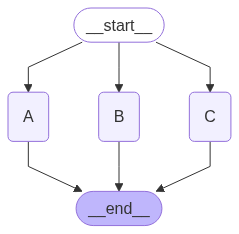

In [101]:
draw_graph(message_graph)

In [102]:
result = message_graph.invoke({"messages": []})

In [103]:
result

{'messages': [HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='da88e568-2b35-473a-9981-f64b42469ffe'),
  HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='854e545c-42e1-4424-9939-698b98a3018d'),
  HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='6ce4a345-6791-420b-bd81-dc5a32014584')]}

In [104]:
result['messages']

[HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='da88e568-2b35-473a-9981-f64b42469ffe'),
 HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='854e545c-42e1-4424-9939-698b98a3018d'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='6ce4a345-6791-420b-bd81-dc5a32014584')]

In [105]:
result = message_graph.invoke({"messages": result['messages'] })

In [106]:
result['messages']

[HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='da88e568-2b35-473a-9981-f64b42469ffe'),
 HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='854e545c-42e1-4424-9939-698b98a3018d'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='6ce4a345-6791-420b-bd81-dc5a32014584'),
 HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='caa6428d-7f74-4ae7-aa6a-5493fd630bde'),
 HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='f6bb8334-420f-4b17-8ca6-159ede910ba8'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='7f57245d-5675-4ec2-a8f0-b057b3fd15b4')]

In [107]:
result = message_graph.invoke({"messages": result['messages'] })

In [108]:
result['messages']

[HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='da88e568-2b35-473a-9981-f64b42469ffe'),
 HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='854e545c-42e1-4424-9939-698b98a3018d'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='6ce4a345-6791-420b-bd81-dc5a32014584'),
 HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='caa6428d-7f74-4ae7-aa6a-5493fd630bde'),
 HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='f6bb8334-420f-4b17-8ca6-159ede910ba8'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='7f57245d-5675-4ec2-a8f0-b057b3fd15b4'),
 HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='32ca4ded-94f1-4202-9060-28cdb047eec1'),
 HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='e8405eac-120e-4d12-829d-10f2dbd004d4')

In [ ]:
# Whatever we have done in above steps is already implemented as MessagesState

In [ ]:
# Lets ensure the messages are never more than 3